<a href="https://colab.research.google.com/github/Aniketpatil1111/Mielage_Prediction_Regression-Anaylisis/blob/main/Hand__Written__Digit__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Prediction - Classification Analysis**

Objective:

The digits dataset consists of 8x8 pixel images pf digits.The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.we will use these arrays to visualize the first 4 images.The target attritube of the dataset stores the digit each image represents

Data Source:

**from** sklearn.datasets

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import Data**

In [2]:
from sklearn.datasets import load_digits

# **Describe Data**

In [3]:
df = load_digits()

# **Data Visualization**

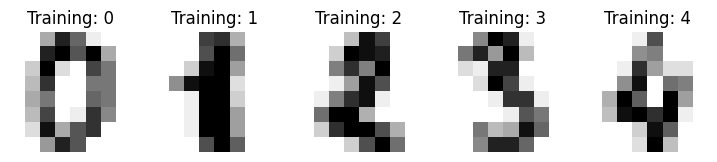

In [9]:
_, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (9, 2))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i' % label)

# **Data Preprocessing**

In [11]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
df.images[0].shape

(8, 8)

In [14]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

# **Scaling Data**

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train test split Data**

In [24]:
from sklearn.model_selection import train_test_split


In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(data, df.target, test_size = 0.4)

In [28]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1078, 64), (719, 64), (1078,), (719,))

# **Modeling**

Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
rf = RandomForestClassifier()

Train or Fit Model

In [33]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

# **Prediction**

Predict Test Data

In [34]:
y_pred = rf.predict(xtest)

In [35]:
y_pred

array([4, 2, 3, 9, 6, 8, 0, 8, 1, 5, 9, 5, 5, 5, 0, 0, 0, 0, 6, 3, 9, 5,
       9, 2, 4, 3, 0, 0, 3, 0, 4, 7, 3, 2, 4, 5, 1, 3, 5, 3, 0, 0, 2, 9,
       4, 5, 3, 5, 4, 1, 1, 6, 0, 6, 5, 3, 1, 6, 8, 2, 6, 7, 2, 3, 5, 4,
       5, 4, 1, 9, 1, 8, 0, 8, 5, 2, 4, 8, 6, 5, 7, 1, 9, 1, 4, 4, 7, 2,
       2, 5, 4, 2, 8, 3, 1, 5, 3, 2, 6, 1, 1, 0, 1, 2, 1, 2, 0, 6, 1, 5,
       8, 7, 6, 7, 6, 7, 5, 2, 1, 6, 3, 3, 8, 0, 9, 8, 3, 7, 7, 4, 2, 8,
       6, 9, 0, 6, 2, 6, 7, 7, 0, 4, 8, 1, 7, 4, 9, 0, 6, 6, 9, 9, 8, 7,
       4, 7, 8, 7, 0, 9, 0, 7, 2, 7, 0, 3, 1, 9, 8, 9, 7, 7, 8, 5, 4, 8,
       2, 6, 6, 5, 8, 9, 6, 6, 4, 2, 7, 4, 1, 8, 3, 5, 6, 7, 0, 2, 9, 5,
       9, 2, 2, 3, 7, 2, 5, 6, 0, 2, 4, 3, 8, 1, 6, 7, 4, 3, 0, 9, 4, 4,
       8, 1, 9, 0, 5, 1, 7, 5, 8, 3, 4, 3, 0, 4, 2, 5, 3, 9, 2, 4, 2, 1,
       4, 4, 7, 1, 7, 5, 2, 1, 2, 7, 4, 8, 6, 7, 9, 3, 3, 7, 7, 2, 4, 8,
       9, 3, 4, 9, 7, 2, 7, 7, 6, 5, 9, 1, 9, 1, 2, 8, 8, 5, 1, 4, 8, 5,
       2, 0, 1, 0, 9, 2, 0, 5, 4, 2, 1, 4, 2, 1, 4,

# **Model Evaluation**

Model Accuracy

In [36]:
from sklearn.metrics import confusion_matrix, classification_report


In [37]:
confusion_matrix(ytest, y_pred)

array([[77,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 71,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 84,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  2,  0,  2,  1,  1],
       [ 0,  0,  0,  0, 74,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 65,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 70,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 71,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 61,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  1,  2, 74]])

In [38]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.99      0.99      0.99        72
           2       1.00      1.00      1.00        84
           3       0.98      0.90      0.94        60
           4       0.97      1.00      0.99        74
           5       0.94      0.97      0.96        67
           6       0.99      1.00      0.99        70
           7       0.96      1.00      0.98        71
           8       0.94      0.97      0.95        63
           9       0.97      0.93      0.95        80

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.97       719
weighted avg       0.98      0.97      0.97       719



# **Explaination**

Handwritten Digit Prediction, or Digit Classification, is like training a computer to read and understand handwritten numbers, similar to how we recognize them ourselves. Imagine you have a bunch of pictures, each showing a handwritten digit from 0 to 9. The goal is to teach the computer how to look at these pictures and figure out which digit is in each one. We split our pictures into two groups: one set to teach the computer (training set) and another to test its skills (testing set). We choose a smart method, like a special problem-solving recipe, for the computer to learn the patterns and differences in the pictures. As it learns, we guide it by telling whether its guesses are right or wrong. Once it masters this skill, we give it new pictures it hasn't seen during training, and it tries its best to guess the correct digit. We check its guesses to see how well it's doing, using simple checks to see if it's getting the numbers correct. This project helps us build a computer that can recognize handwritten digits, which has practical uses like reading postal codes or helping computers understand our handwriting. It's like teaching the computer to read your handwriting.